In [15]:
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress

In [16]:
# generate city locations
def rand_cities(num_cities=5):
    xy = np.random.rand(num_cities,2)
    labels = ['{0}'.format(i) for i in range(num_cities)]
    return xy, labels

In [17]:
def plot_cities(xy, labels=[], show_labels=True):
    colors = (0,0,0)
    area = 10
    plt.scatter(xy[:,0], xy[:,1], s=area, c=colors, alpha=0.5)
    plt.title('Cities')
    
    for label, x, y in zip(labels, xy[:, 0], xy[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [18]:
def rand_tours(num_routes=3, num_cities=5):
    tours = [random.sample(range(num_cities), num_cities) for x in range(num_routes)]
    return tours

In [24]:
def plot_tour(cities, tour, show_labels=False):
    x = cities[tour, 0]
    y = cities[tour, 1]
    
    colors = (0,0,0)
    area = 100
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.plot(x,y)
    
    if show_labels:
        for label, x, y in zip(labels, x, y):
            plt.annotate(
                label,
                xy=(x, y), xytext=(-20, 20),
                textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Tour len: {tour_len(tour, cities):.2f}')
    plt.show()

In [20]:
def dist(cities, idx_1, idx_2):
    dx = (cities[idx_1, 0] - cities[idx_2, 0])
    dy = (cities[idx_1, 1] - cities[idx_2, 1])
    d = np.sqrt(dx**2 + dy**2)
    return d
    
def tour_len(tour, cities):
    lenght = 0.0
    for i in range(1, num_cities):
        lenght += dist(cities, tour[i-1], tour[i])
    lenght += dist(cities, tour[num_cities-1], tour[0])
    return lenght

In [21]:
def tours_len(tours, cities):
    tl = []
    for i, tour in enumerate(tours):
        tl.append(tour_len(tour, cities))
    return tl
    

num cities: 80 num tours: 5000


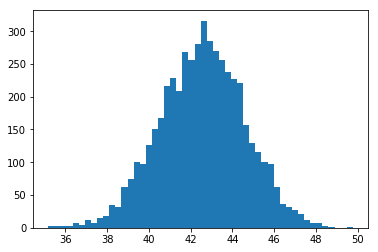

In [219]:
num_cities = 80
num_routes = 5000

cities, labels = rand_cities(num_cities=num_cities)
tours = rand_tours(num_cities=num_cities, num_routes=num_routes)
print('num cities:', cities.shape[0], 'num tours:', len(tours))
tl = tours_len(tours, cities)
plt.hist(tl, 50)
plt.show()

# Sort random routes

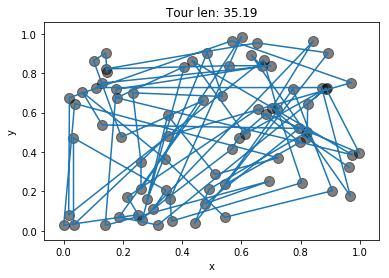

280 35.194664132413294
139 35.4383543141869
1276 35.703276710354146
4619 35.72689043968682
2223 35.85837324966275


In [220]:
routes_sorted = np.argsort(tl)
plot_tour(cities=cities, tour=tours[routes_sorted[0]])
for i in range(5):
    rt_idx = routes_sorted[i]
    print(rt_idx, tl[rt_idx])


# Natural selection

In [297]:
def natural_selection(tours, routes_sorted, tl):
    # calculate stenght of each solution when facing challenge/danger in natural environment
    capacity = np.zeros(routes_sorted.shape)
    for rnk, idx in enumerate(routes_sorted):
        capacity[idx] = 1.0 - rnk/num_routes

    # threshold method
    survived = (capacity > 0.7)
    # challenge method
    #challenge = np.random.rand(num_routes,1)
    #survived = (capacity >= 1.0 * challenge.T).tolist()
    #survived=survived[0]

    # visualization
    #tl_2 = list(compress(list(tl), survived))
    #plt.hist(tl_2, 50)
    #plt.show()
    #print(len(tl), len(tl_2))
    
    survived_idx = list(compress(routes_sorted, survived))
    #print(survived_idx)
    
    return [tours[i] for i in survived_idx]
    

In [298]:
tours = natural_selection(tours, routes_sorted, tl)
len(tours)

552

# Mutations

In [ ]:
for tour in tours:
    # n_replicas is function of fitnes
    for replica in range(n_replicas)
        tour_new = swap